In [43]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#read data
data=pd.read_csv('/content/car_age_price.csv')

In [45]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [47]:
data.describe() #describe statistics of the data

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


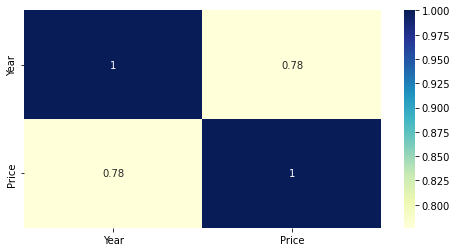

In [48]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu') #plotting heatmap

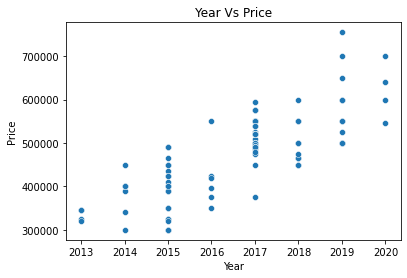

In [49]:
plt.title("Year Vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
sns.scatterplot(x='Year', y='Price', data=data)

## **LinearRegression**

In [63]:
# Import the module train_test_split
from sklearn.model_selection import train_test_split
# Define our predictor and target variables
#Selecting the required parameters
Year = data['Year']
price = data['Price']
x = np.array(Year).reshape(-1,1)
y = np.array(price)
# Create four groups using train_test_split. By default, 75% of data is assigned to train, the other 25% to test.
x_train, x_test, y_train, y_test = train_test_split(x, y )

In [64]:
#Import LinearRegression and split the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
#Fit the model over the training dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [66]:
#Calculate intercept and coefficient
print(model.intercept_)
print(model.coef_)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
#Calculate root mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))

[-84039560.1374744]
[[41911.99444634]]
MSE :  3300622013.458548
RMSE :  57451.04014252961


In [67]:
# Import r2_score module
from sklearn.metrics import r2_score
# Print R2 Score
print(r2_score(y_test, predictions))

0.5426152630717009


# **Lasso Regression**

In [62]:
#Lasso regression model
from sklearn.linear_model import Lasso
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.6046895254071346
The test score for ls model is 0.5376507055970101
